## Pandas - Applications in Finance

In [1]:
import numpy as np
import pandas as pd
import datetime, calendar

import matplotlib.pyplot as plt
from mpl_finance import candlestick_ohlc

import matplotlib.dates as mdates

np.set_printoptions(suppress=True)

In [2]:
datafile = 'http://people.bu.edu/kalathur/datasets/AAPL.csv'

df = pd.read_csv(datafile, index_col='Date', parse_dates=True)
df = df.round(2)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,154.89,158.85,154.23,157.92,156.05,37039700
2019-01-03,143.98,145.72,142.00,142.19,140.51,91312200
2019-01-04,144.53,148.55,143.80,148.26,146.50,58607100
2019-01-07,148.70,148.83,145.90,147.93,146.18,54777800
2019-01-08,149.56,151.82,148.52,150.75,148.96,41025300
...,...,...,...,...,...,...
2019-09-10,213.86,216.78,211.71,216.70,216.70,31777900
2019-09-11,218.07,223.71,217.73,223.59,223.59,44289600
2019-09-12,224.80,226.42,222.86,223.09,223.09,32226700


In [3]:
df.mean().round(2)

Open              189.65
High              191.59
Low               188.10
Close             189.94
Adj Close         188.90
Volume       28910325.84
dtype: float64

**Volume Weighted Average Price (VWAP)**

In [4]:
vwap = np.average(df['Adj Close'], weights=df['Volume'])
print("VWAP =", vwap)

VWAP = 187.04154812148687


### Averages by Day of Week

In [5]:
for freq in ['W-MON', 'W-TUE', 'W-WED', 'W-THU', 'W-FRI']:
    print(freq, "Average", df.resample(freq).asfreq().dropna()['Adj Close'].mean().round(2))

W-MON Average 190.02
W-TUE Average 188.58
W-WED Average 189.2
W-THU Average 188.45
W-FRI Average 188.31


In [6]:
result = df.groupby(df.index.dayofweek)['Adj Close'].mean().round(2)
result

Date
0    190.02
1    188.58
2    189.20
3    188.45
4    188.31
Name: Adj Close, dtype: float64

In [7]:
result.index = [calendar.day_name[index] for index in result.index]
result

Monday       190.02
Tuesday      188.58
Wednesday    189.20
Thursday     188.45
Friday       188.31
Name: Adj Close, dtype: float64

**Interpreting Moving Averages**

https://www.tradingview.com/wiki/Moving_Average

## Simple Moving Average (SMA)
 - For analyzing time-series data
 - Moving window of N periods
 - Mean of values inside the window
 - an unweighted moving average

In [8]:
# 20-day moving window

N = 20

In [9]:
newDF = df.copy()

In [10]:
newDF['SMA'] = df['Adj Close'].rolling(window=N).mean().round(2)
newDF

,Open,High,Low,Close,Adj Close,Volume,SMA
Date,,,,,,,
2019-01-02,154.89,158.85,154.23,157.92,156.05,37039700,NaN
2019-01-03,143.98,145.72,142.00,142.19,140.51,91312200,NaN
2019-01-04,144.53,148.55,143.80,148.26,146.50,58607100,NaN
2019-01-07,148.70,148.83,145.90,147.93,146.18,54777800,NaN
2019-01-08,149.56,151.82,148.52,150.75,148.96,41025300,NaN
...,...,...,...,...,...,...,...
2019-09-10,213.86,216.78,211.71,216.70,216.70,31777900,208.73
2019-09-11,218.07,223.71,217.73,223.59,223.59,44289600,209.46
2019-09-12,224.80,226.42,222.86,223.09,223.09,32226700,210.48


In [11]:
newDF['mDate'] = mdates.date2num(df.index)  # Convert datetime objects into matplotlib dates objects
newDF
    

,Open,High,Low,Close,Adj Close,Volume,SMA,mDate
Date,,,,,,,,
2019-01-02,154.89,158.85,154.23,157.92,156.05,37039700,NaN,737061.0
2019-01-03,143.98,145.72,142.00,142.19,140.51,91312200,NaN,737062.0
2019-01-04,144.53,148.55,143.80,148.26,146.50,58607100,NaN,737063.0
2019-01-07,148.70,148.83,145.90,147.93,146.18,54777800,NaN,737066.0
2019-01-08,149.56,151.82,148.52,150.75,148.96,41025300,NaN,737067.0
...,...,...,...,...,...,...,...,...
2019-09-10,213.86,216.78,211.71,216.70,216.70,31777900,208.73,737312.0
2019-09-11,218.07,223.71,217.73,223.59,223.59,44289600,209.46,737313.0
2019-09-12,224.80,226.42,222.86,223.09,223.09,32226700,210.48,737314.0


In [12]:
olhc = newDF[['mDate', 'Open', 'High', 'Low', 'Adj Close']].copy().values
olhc[:5]

array([[737061.  ,    154.89,    158.85,    154.23,    156.05],
       [737062.  ,    143.98,    145.72,    142.  ,    140.51],
       [737063.  ,    144.53,    148.55,    143.8 ,    146.5 ],
       [737066.  ,    148.7 ,    148.83,    145.9 ,    146.18],
       [737067.  ,    149.56,    151.82,    148.52,    148.96]])

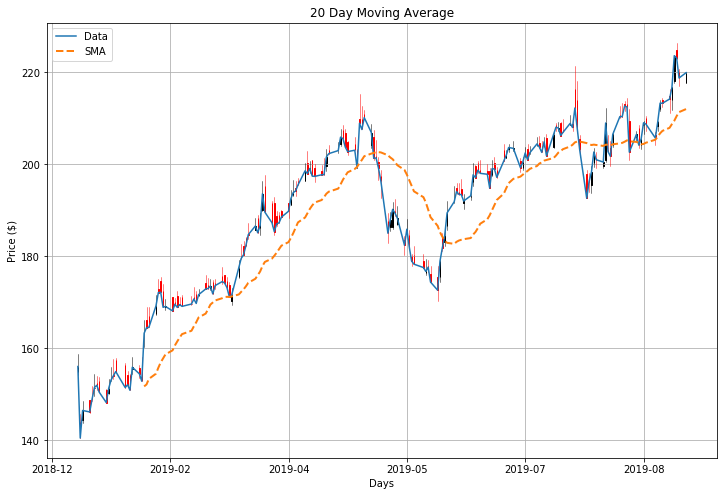

In [13]:
fig, ax = plt.subplots(1, figsize=(12,8))

candlestick_ohlc(ax, olhc) # requires a numpy array (i.e. olhc above)

plt.plot(newDF['mDate'], newDF['Adj Close'], label='Data')
plt.plot(newDF['mDate'], newDF['SMA'], '--', lw=2.0, label='SMA')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.title("20 Day Moving Average")
plt.xlabel("Days")
plt.ylabel("Price ($)")
plt.grid()
plt.legend()
plt.show()



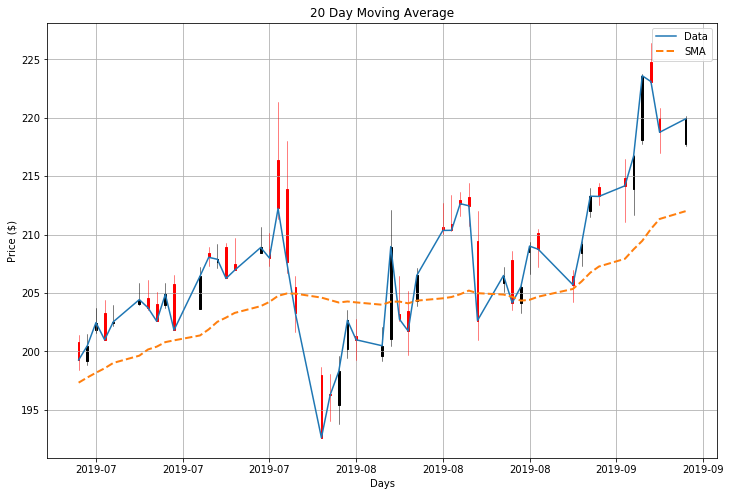

In [14]:
# Show plot for lastN values only

lastN = 50

fig, ax = plt.subplots(1, figsize=(12,8))

candlestick_ohlc(ax, olhc[-lastN:])

plt.plot(newDF['mDate'][-lastN:], newDF['Adj Close'][-lastN:], label='Data')
plt.plot(newDF['mDate'][-lastN:], newDF['SMA'][-lastN:], '--', lw=2.0, label='SMA')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.title("20 Day Moving Average")
plt.xlabel("Days")
plt.ylabel("Price ($)")
plt.grid()
plt.legend()
plt.show()

## Weighted Moving Average (WMA)

In [15]:
# 20-day moving window

N = 20

In [16]:
weights = np.arange(1, N+1)
print(weights)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


In [22]:
# Return closure function to be applied on each group

def f(w):  # A function that returns a function
    def g(x):
        return np.sum(x*w)/sum(w)
    return g

In [26]:
newDF['WMA'] = df[['Adj Close']].rolling(window=N).apply(f(weights))
newDF

/Users/mcorbett/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  """Entry point for launching an IPython kernel.


,Open,High,Low,Close,Adj Close,Volume,SMA,mDate,WMA,EMA
Date,,,,,,,,,,
2019-01-02,154.89,158.85,154.23,157.92,156.05,37039700,NaN,737061.0,NaN,NaN
2019-01-03,143.98,145.72,142.00,142.19,140.51,91312200,NaN,737062.0,NaN,NaN
2019-01-04,144.53,148.55,143.80,148.26,146.50,58607100,NaN,737063.0,NaN,NaN
2019-01-07,148.70,148.83,145.90,147.93,146.18,54777800,NaN,737066.0,NaN,NaN
2019-01-08,149.56,151.82,148.52,150.75,148.96,41025300,NaN,737067.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2019-09-10,213.86,216.78,211.71,216.70,216.70,31777900,208.73,737312.0,209.944000,214.881240
2019-09-11,218.07,223.71,217.73,223.59,223.59,44289600,209.46,737313.0,211.359048,219.235620
2019-09-12,224.80,226.42,222.86,223.09,223.09,32226700,210.48,737314.0,212.656857,221.162810


/Users/mcorbett/anaconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


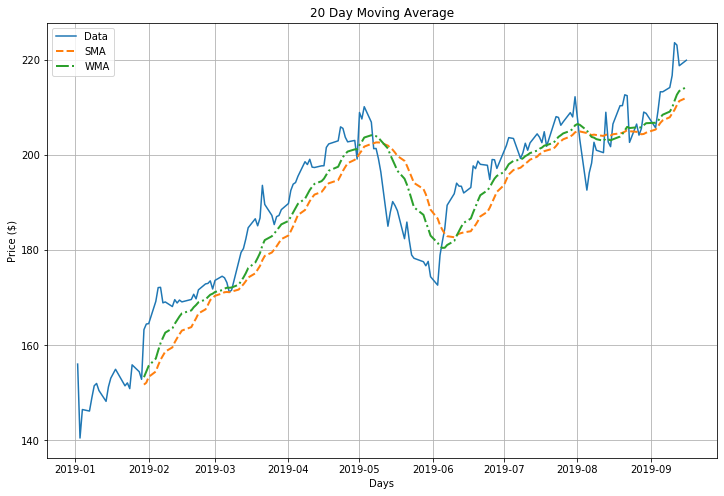

In [19]:
fig, ax = plt.subplots(1, figsize=(12,8))

plt.plot(newDF.index, newDF['Adj Close'], label='Data')
plt.plot(newDF.index, newDF['SMA'], '--', lw=2.0, label='SMA')
plt.plot(newDF.index, newDF['WMA'], '-.', lw=2.0, label='WMA')

plt.title("20 Day Moving Average")
plt.xlabel("Days")
plt.ylabel("Price ($)")
plt.grid()
plt.legend()
plt.show()


## Exponential Moving Average (EMA)
 - For analyzing time-series data
 - Alternative to SMA
 - Moving window of N periods
 - Uses exponentially decreasing weights
 - Gives higher weights to recent prices
 - weighted averages are calculated using weights $(1-alpha)**(n-1), (1-alpha)**(n-2), …, 1-alpha, 1$
 

In [20]:
newDF['EMA'] = df[['Adj Close']].ewm(alpha=0.5, min_periods=N).mean()
newDF

,Open,High,Low,Close,Adj Close,Volume,SMA,mDate,WMA,EMA
Date,,,,,,,,,,
2019-01-02,154.89,158.85,154.23,157.92,156.05,37039700,NaN,737061.0,NaN,NaN
2019-01-03,143.98,145.72,142.00,142.19,140.51,91312200,NaN,737062.0,NaN,NaN
2019-01-04,144.53,148.55,143.80,148.26,146.50,58607100,NaN,737063.0,NaN,NaN
2019-01-07,148.70,148.83,145.90,147.93,146.18,54777800,NaN,737066.0,NaN,NaN
2019-01-08,149.56,151.82,148.52,150.75,148.96,41025300,NaN,737067.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2019-09-10,213.86,216.78,211.71,216.70,216.70,31777900,208.73,737312.0,209.944000,214.881240
2019-09-11,218.07,223.71,217.73,223.59,223.59,44289600,209.46,737313.0,211.359048,219.235620
2019-09-12,224.80,226.42,222.86,223.09,223.09,32226700,210.48,737314.0,212.656857,221.162810


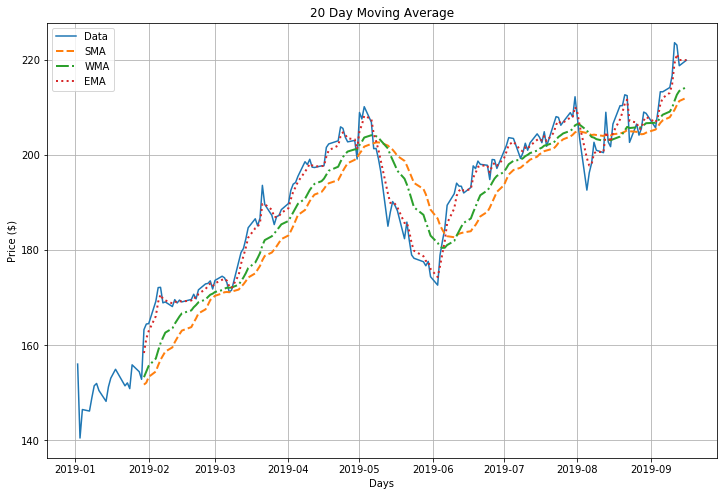

In [21]:
fig, ax = plt.subplots(1, figsize=(12,8))

plt.plot(newDF.index, newDF['Adj Close'], label='Data')
plt.plot(newDF.index, newDF['SMA'], '--', lw=2.0, label='SMA')
plt.plot(newDF.index, newDF['WMA'], '-.', lw=2.0, label='WMA')
plt.plot(newDF.index, newDF['EMA'], ':',  lw=2.0, label="EMA")


plt.title("20 Day Moving Average")
plt.xlabel("Days")
plt.ylabel("Price ($)")
plt.grid()
plt.legend()
plt.show()